In [208]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
plt.ion()

In [97]:
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('ggplot')

# Store Data

In [13]:
df = pd.read_csv('merged.csv', index_col=[0])
df.sale_date = pd.to_datetime(df.sale_date)
df = df.set_index('sale_date')

In [14]:
df.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-02,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-03,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-04,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-05,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [16]:
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [18]:
train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']

<AxesSubplot:xlabel='sale_date'>

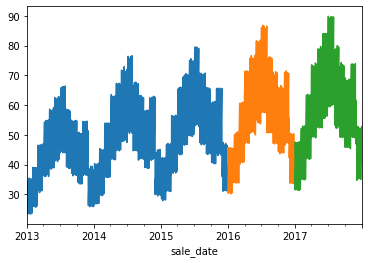

In [22]:
train.resample('D').sale_amount.mean().plot()
validate.resample('D').sale_amount.mean().plot()
test.resample('D').sale_amount.mean().plot()

In [114]:
x = train.resample('D').sale_amount.mean()

Text(0, 0.5, '% Change')

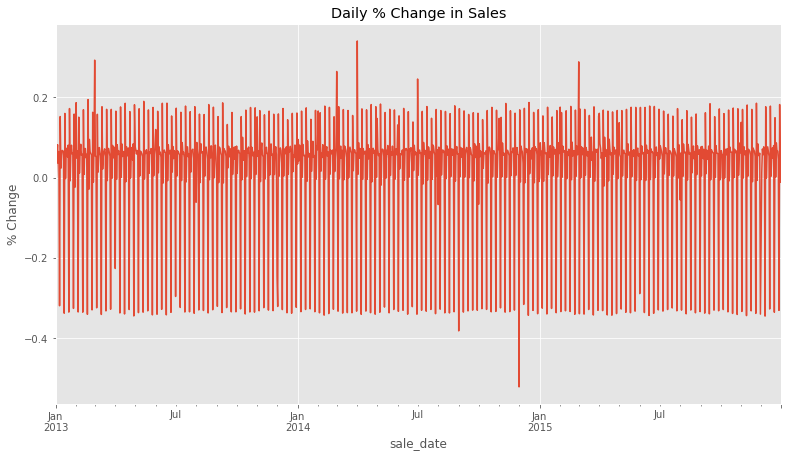

In [115]:
# explore daily % change in sales
(x.diff() / x.shift()).plot()
plt.title('Daily % Change in Sales')
plt.ylabel('% Change')

Note: fairly consistent with a few outliers

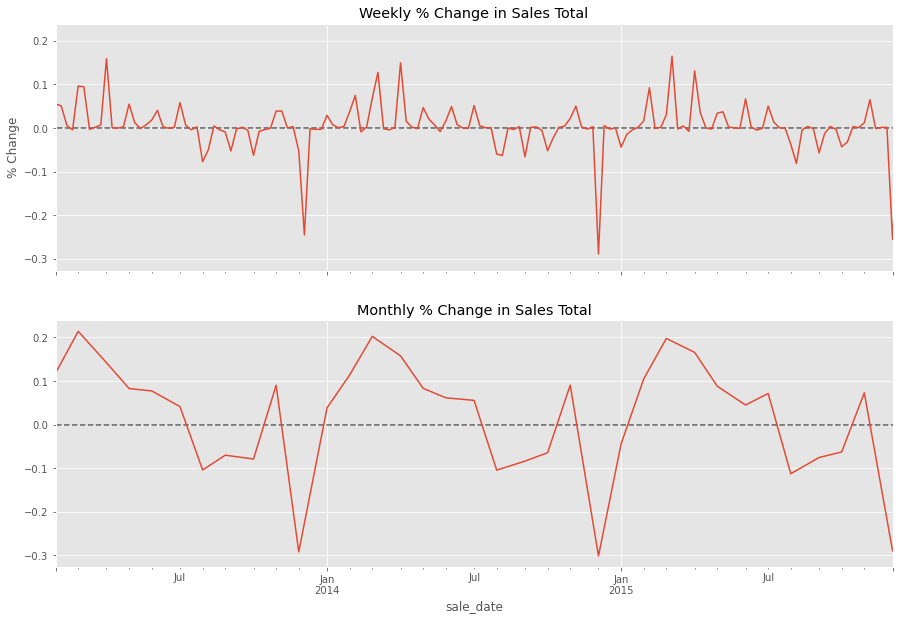

In [116]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10), sharex=True, sharey=True)

weekly = x.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')
ax1.hlines(0, *ax2.get_xlim(), color='black', alpha=.6, ls='--')

monthly = x.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
ax2.hlines(0, *ax2.get_xlim(), color='black', alpha=.6, ls='--')

Note: seasonality visible in monthly data with sales dramatically dropping between Nov & Dec, then gaining Jan-Mar and again slowing Mar-Aug before rising in Oct 

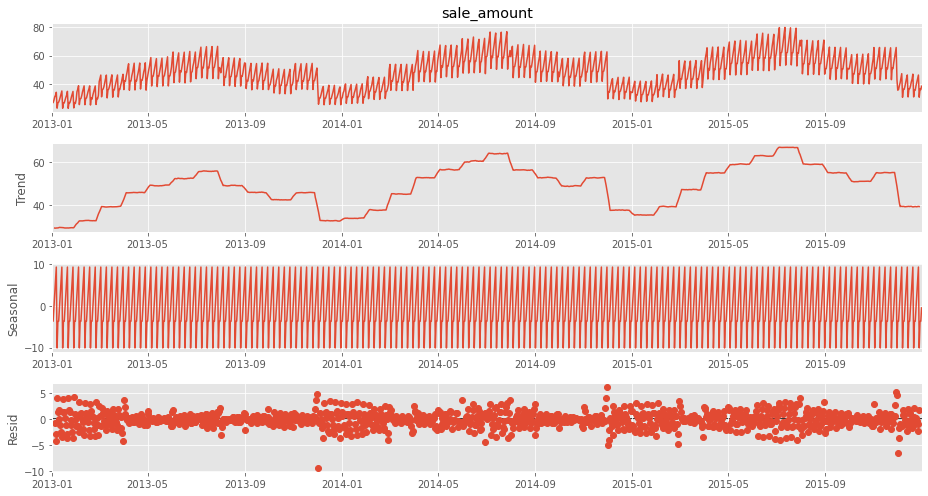

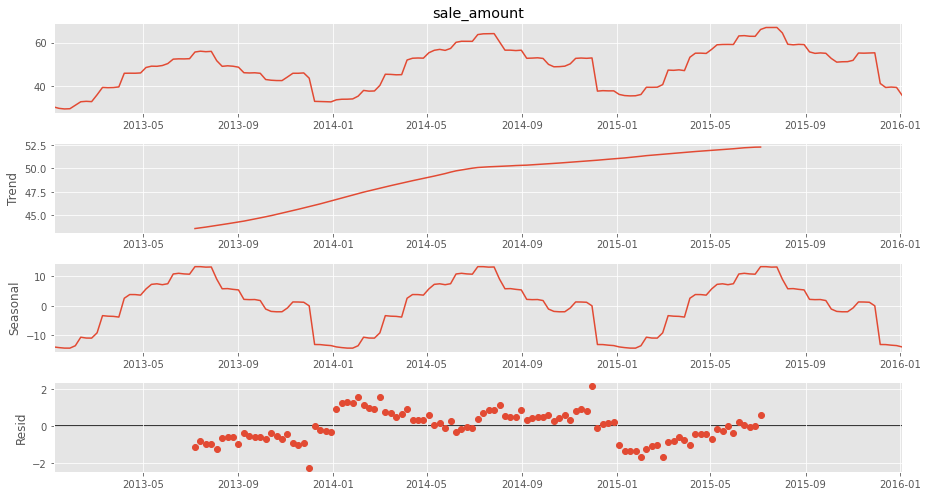

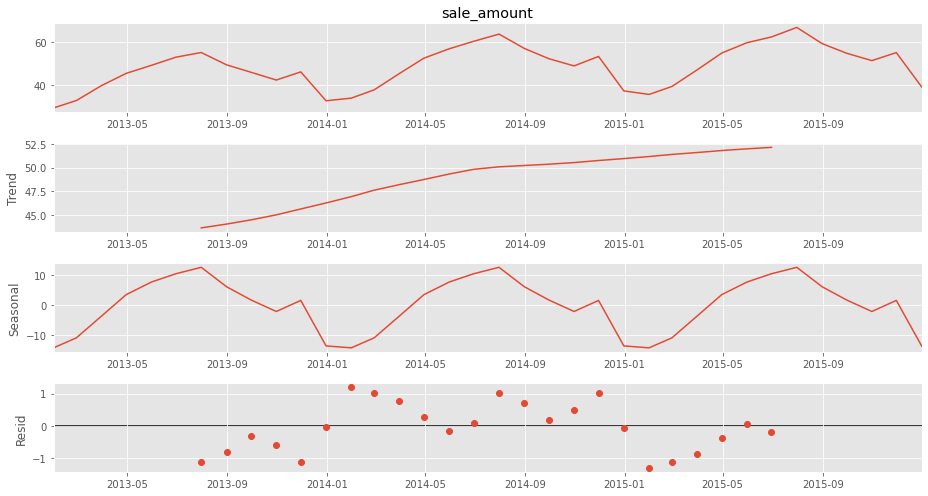

In [126]:
freq = ['D', 'W', 'M']
for i in freq:
    sm.tsa.seasonal_decompose(x.resample(i).mean()).plot()   

Note: seasonality visible on D, W, M timeframes.  Monthly timeframe least noisy 

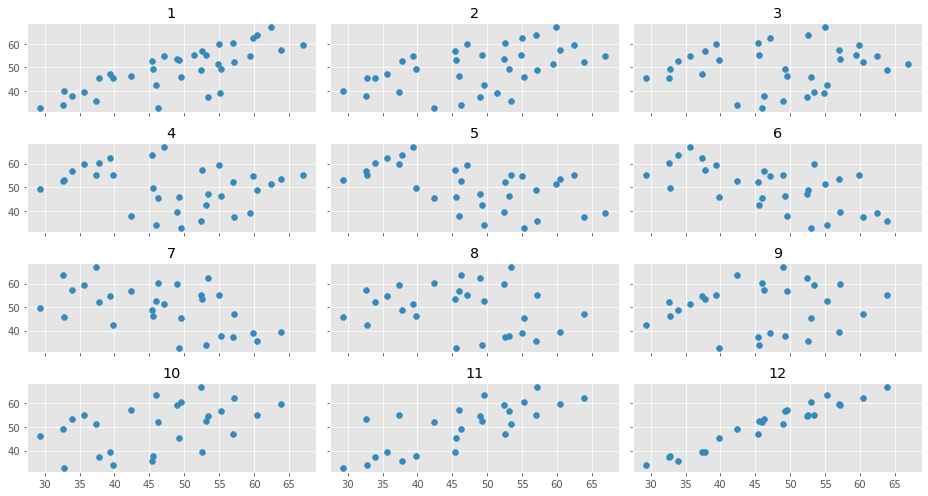

In [129]:
fig, axs = plt.subplots(4, 3, sharex=True, sharey=True)

for ax, lag in zip(axs.ravel(), range(1, 13)):
    pd.plotting.lag_plot(monthly, lag=lag, ax=ax)
    ax.set(title=lag, xlabel='', ylabel='')
    
fig.tight_layout()

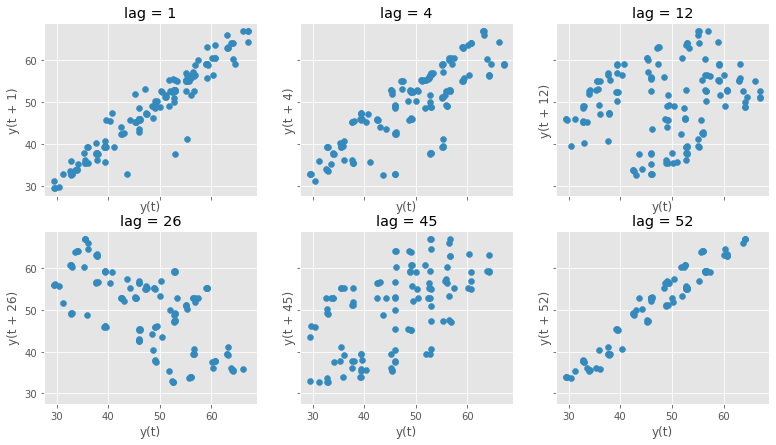

In [153]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

for ax, lag in zip(axs.ravel(), [1, 4, 12, 26, 45, 52]):
    pd.plotting.lag_plot(weekly, lag=lag, ax=ax)
    ax.set(title='lag = ' + str(lag))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

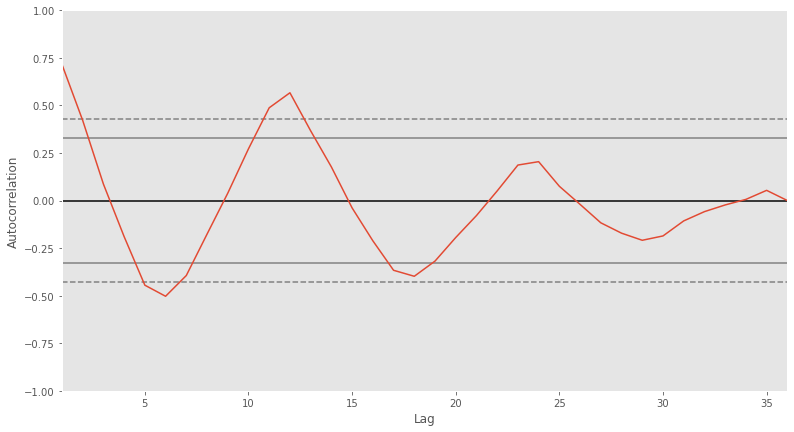

In [147]:
pd.plotting.autocorrelation_plot(x.resample('M').mean())

Note: again the monthly lag and autocorrelation show strong seasonality.  Autocorrelation diminishes beyond 1yr but the seasonality persists
* 6 month lag appears to show strong negative correlation

# OPSD Data

In [154]:
df2 = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
print(df.shape)
df2.head()

(913000, 15)


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [155]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [159]:
df2['Date']=pd.to_datetime(df2['Date'])

In [161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [162]:
df2 = df2.set_index('Date')

In [188]:
df2.index.min(), df2.index.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [177]:
# fill Nan with 0s
df2 = df2.fillna(0)

<AxesSubplot:xlabel='Date'>

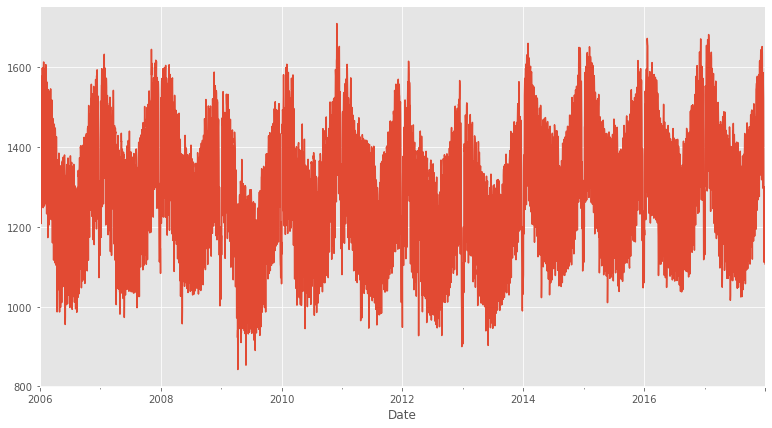

In [178]:
df2.Consumption.plot()

Note: Annual seasonality with consumption highest in early/later months declining mid-year.

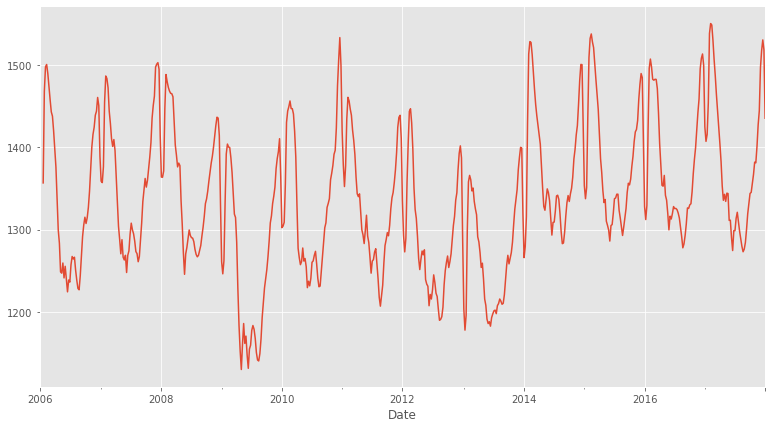

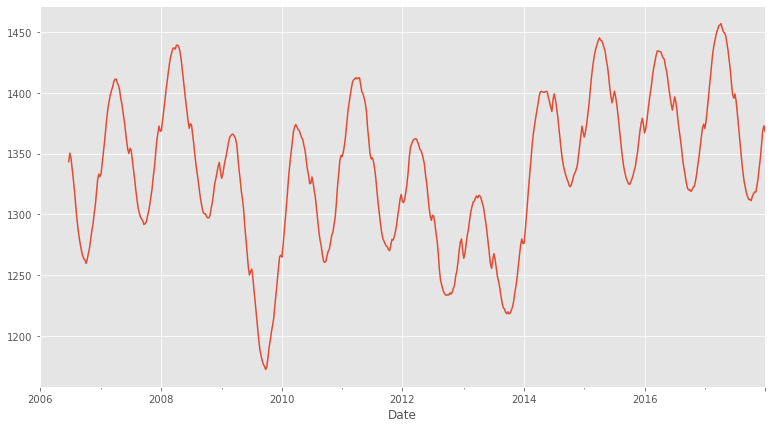

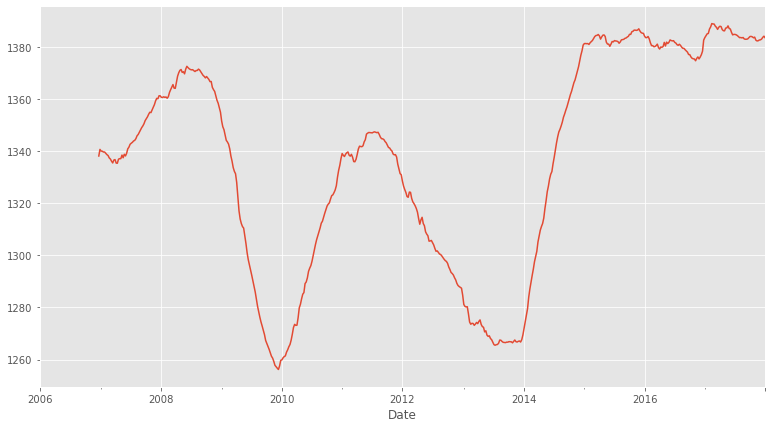

In [198]:
# visualize entire data using 4, 26 & 52 week rolling averages
horizon = [4, 26, 52]
for h in horizon:
    df2.Consumption.resample('W').mean().rolling(h).mean().plot()
    plt.show()

Note: after smoothing the data, an apparent shift in Consumption higher appears to have occured in 2014 and beyond

#### Split Data

** Use human method due to annual seasonality **

In [199]:
train=df2[:'2013']
validate=df2['2014':'2015']
test=df2['2016':'2017']

In [200]:
train = train.resample('M').mean()
validate = validate.resample('M').mean()
test = test.resample('M').mean()

<AxesSubplot:xlabel='Date'>

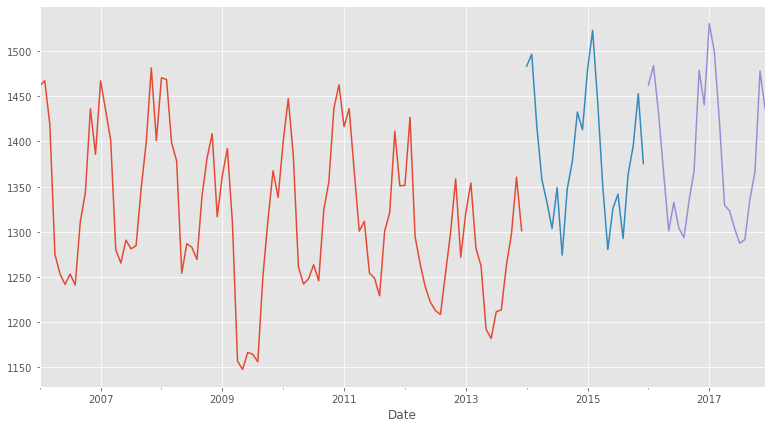

In [201]:
train.Consumption.plot()
validate.Consumption.plot()
test.Consumption.plot()

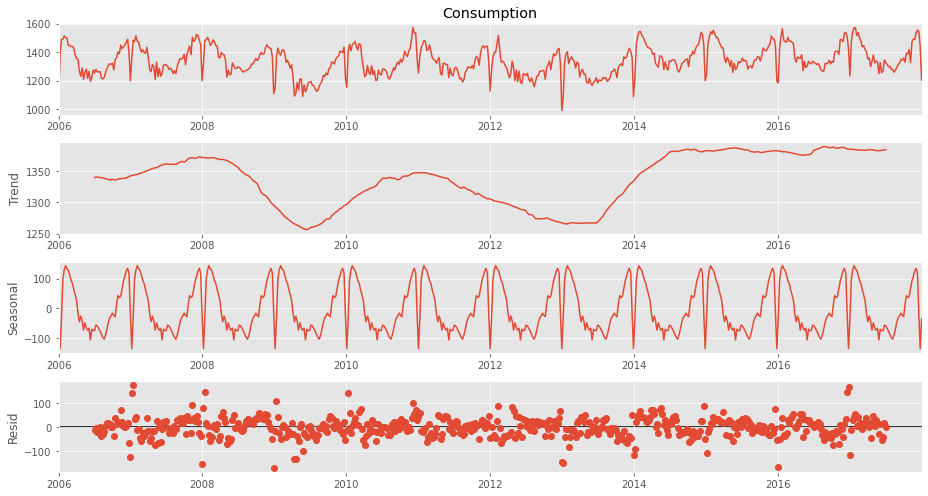

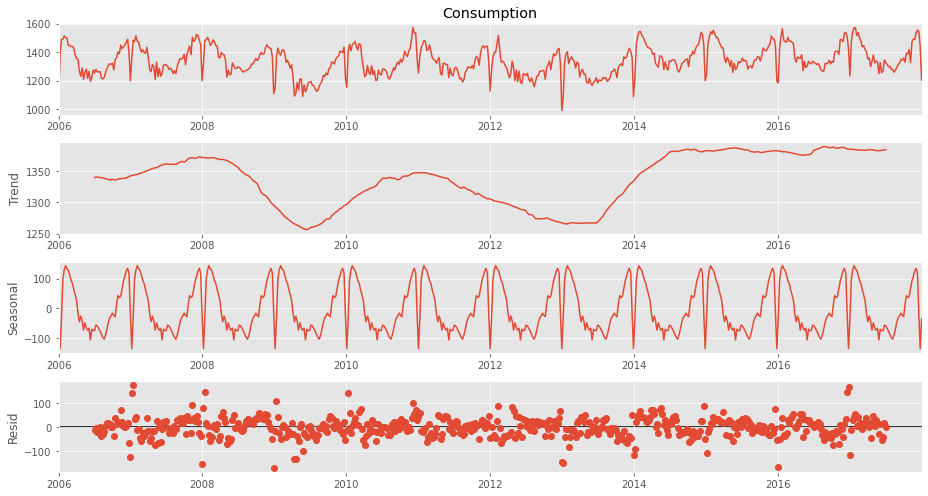

In [205]:
sm.tsa.seasonal_decompose(df2.Consumption.resample('W').mean()).plot()

In [214]:
df2 = df2.resample('M').mean()

<AxesSubplot:xlabel='Date'>

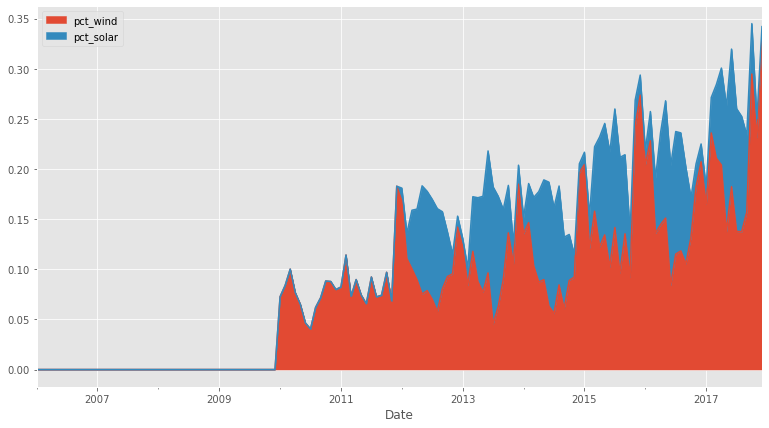

In [218]:
df2['pct_wind'] = df2.Wind / df2.Consumption
df2['pct_solar'] = df2.Solar / df2.Consumption
df2[['pct_wind', 'pct_solar']].plot.area()

Note: Rise in total Consumption appears to coincide with an increase in both wind and solar energy as a percentage of overall Consumption